In [2]:
import cv2
import glob
import numpy as np
from IPython.display import clear_output # clear display

def click_and_save(event, x, y, flags, param):
    global pts1
    if event == cv2.EVENT_LBUTTONDOWN:
        pts1.append([x,y])
    return 0

def get_width_height(img):
    #define the screen resulation
    screen_res = 1280, 720
    scale_width = screen_res[0] / img.shape[1]
    scale_height = screen_res[1] / img.shape[0]
    scale = 2.5 # Ajust for scale the image
 
    #resized window width and height
    window_width = int(img.shape[1] * scale)
    window_height = int(img.shape[0] * scale)
    return window_width, window_height

def calc_radius(center_pixel, circle_pixel):
    return np.linalg.norm(np.array(center_pixel)-np.array(circle_pixel))//1

def calc_angle(p0, p1):
    
    x0,y0 = p0
    x1,y1 = p1
    
    if (x0 == x1 and x1 > x0):
        return 90
    
    if (x0 == x1 and x0 > x1):
        return -90
    
    ca = x1 - x0
    co = y1 - y0
    
    angle_in_rad = np.arctan(co/ca)
    angle_in_degree = np.rad2deg(angle_in_rad)
    
    return int(angle_in_degree)

In [125]:
path3 = glob.glob("cropped_images/teste/*")
d = []
d2 = []
pts1 = []

for i in range(len(path3)):
    
    filename = path3[i]
        
    image = cv2.imread(filename)
    clone = image.copy()
    cont = 1
    
    while True:
        cv2.namedWindow(str(i), cv2.WINDOW_NORMAL)
        window_width, window_height = get_width_height(clone)
        cv2.resizeWindow(str(i), window_width, window_height)
        cv2.moveWindow(str(i), 380, 20) 
        cv2.setMouseCallback(str(i), click_and_save)
        cv2.imshow(str(i), clone)
        k = cv2.waitKey(0)
        print(k)

        if k == 27:         # wait for ESC key to exit
            cv2.destroyAllWindows()
            break
        if k == 32: # espaço
            print(k)
            break
        if k== 49:
            d2.append("cherry")
        if k== 50:
            d2.append("black")
        if k== 51:
            d2.append("green")
        
        
        raio1 = int(calc_radius(pts1[0], pts1[1]))
        raio2 = int(calc_radius(pts1[0], pts1[2]))#primeiro click e terceiro click
        axesLength = (raio1, raio2)
        angle = calc_angle(pts1[0], pts1[1])
        
        startAngle = 0
        endAngle = 360
        
        color = (255, 255, 255)
        thickness = 1
        center = tuple(pts1[0])
        #cv2.circle(clone, center, raio, (0,0,180), -1)
        cv2.ellipse(clone, center, axesLength, angle, startAngle, endAngle, color,thickness)
        
        d.append({
            "image_id":i,
            "mask_id": cont,
            "image_file": filename,
            "center":center,
            "axesLength":axesLength ,
            "angle":angle,
            
        }),
        pts1 = []
        clear_output(wait=True)
        print('mask_id:',d[-1]['mask_id'])
        print('image_id:',d[-1]['image_id'])    
        cont += 1 
    if k==27:
        break


mask_id: 8
image_id: 92
27


In [72]:
print(d2)

['cherry', 'cherry', 'cherry', 'cherry', 'cherry', 'cherry', 'cherry', 'cherry', 'cherry']


In [116]:
print(d)

[{'image_id': 92, 'mask_id': 1, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (191, 162), 'axesLength': (11, 16), 'angle': 45}, {'image_id': 92, 'mask_id': 2, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (236, 90), 'axesLength': (15, 12), 'angle': -7}, {'image_id': 92, 'mask_id': 3, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (212, 84), 'axesLength': (11, 15), 'angle': -37}, {'image_id': 92, 'mask_id': 4, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (235, 72), 'axesLength': (10, 12), 'angle': -29}, {'image_id': 92, 'mask_id': 5, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (218, 149), 'axesLength': (12, 10), 'angle': -51}, {'image_id': 92, 'mask_id': 6, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (220, 241), 'axesLength': (8, 15), 'angle': 45}, {'image_id': 92, 'mask_id': 7, 'image_file': 'cropped_images/teste\\970002.jpg', 'center': (244, 180), 'axesLength': (11, 10), 'angle': -19}, {'image_id':

In [126]:
from skimage.draw import ellipse
import matplotlib.pyplot as plt
import random
import math
import re

In [127]:
mask = np.zeros([500, 500, len(d)],
                dtype=np.uint8)
for i in range(len(d)):
    rr, cc = ellipse(d[i]['center'][1], d[i]['center'][0], d[i]['axesLength'][1],d[i]['axesLength'][0] , rotation=np.deg2rad(-d[i]['angle']))
    try:
        mask[rr, cc, i] = 1
    except:
        continue
mask_re=mask[0:256,0:256,:]

      

In [128]:
mask_re.shape

(256, 256, 8)

In [129]:
m = np.sum(mask_re * np.arange(1, mask_re.shape[-1] + 1), -1)

In [130]:
m[m< 0.1] =0
m[m>0.5] = 255

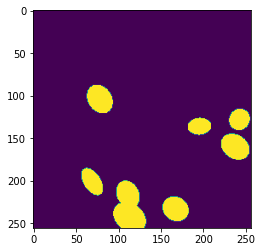

In [131]:
plt.imshow(m)

In [132]:
count = 0

for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        if m[i][j]==255:
            count += 1

print(count)

5329


In [111]:
m.shape

(256, 256)

In [58]:
256*256

65536

In [8]:
for i in d:
    x = d.index(i)
    i['tipo'] = d2[x]

In [11]:
import json
import requests


with open('data2/via.json', 'w') as f:
    json.dump(d, f)

In [10]:
import json
import requests

with open('data2/via.json') as json_file:
    data = json.load(json_file)

FileNotFoundError: [Errno 2] No such file or directory: 'data2/via.json'

In [13]:
print(data)

[{'image_id': 0, 'mask_id': 1, 'image_file': 'data1\\cereja1.jpg', 'center': [134, 81], 'axesLength': [28, 30], 'angle': 4, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 2, 'image_file': 'data1\\cereja1.jpg', 'center': [146, 147], 'axesLength': [23, 37], 'angle': 25, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 3, 'image_file': 'data1\\cereja1.jpg', 'center': [110, 187], 'axesLength': [29, 29], 'angle': 9, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 4, 'image_file': 'data1\\cereja1.jpg', 'center': [131, 238], 'axesLength': [26, 29], 'angle': 32, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 5, 'image_file': 'data1\\cereja1.jpg', 'center': [165, 202], 'axesLength': [21, 28], 'angle': -5, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 6, 'image_file': 'data1\\cereja1.jpg', 'center': [19, 180], 'axesLength': [26, 26], 'angle': -22, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 7, 'image_file': 'data1\\cereja1.jpg', 'center': [63, 180], 'axesLength': [18, 23], 'angle': -45, 'tipo': 'cher

In [14]:
d[-1]

{'image_id': 60,
 'mask_id': 10,
 'image_file': 'data1\\verde9.jpg',
 'center': (247, 29),
 'axesLength': (17, 28),
 'angle': -6,
 'tipo': 'green'}

In [15]:
datafim3 = data + d

In [16]:
datafim3[-1]

{'image_id': 60,
 'mask_id': 10,
 'image_file': 'data1\\verde9.jpg',
 'center': (247, 29),
 'axesLength': (17, 28),
 'angle': -6,
 'tipo': 'green'}

In [19]:
import json
import requests


with open('data1/via9.json', 'w') as f:
    json.dump(datafim3, f)

In [11]:
datafim[-1]

{'image_id': 49,
 'mask_id': 8,
 'image_file': 'data1\\verde17.jpg',
 'center': (11, 88),
 'axesLength': (17, 16),
 'angle': 79,
 'tipo': 'green'}

In [14]:
datafim2 = datafim + d

In [20]:
datafim3 = datafim + d

In [6]:
datafim4 = datafim3 + d

NameError: name 'datafim3' is not defined

In [71]:
print(d[-15])

{'image_id': 20, 'mask_id': 7, 'image_file': 'cropped_images/valid\\300009.jpg', 'center': (84, 146), 'axesLength': (21, 21), 'angle': -41, 'tipo': 'green'}


In [19]:
len(d)

121

In [12]:
data.extend(d)

In [13]:
data[-120]

{'image_id': 29,
 'mask_id': 1,
 'image_file': 'data1\\preto18.jpg',
 'center': [160, 63],
 'axesLength': [21, 25],
 'angle': 2,
 'tipo': 'black'}

In [14]:
import json
import requests


with open('data1/via3.json', 'w') as f:
    json.dump(data, f)

In [13]:
import json
import requests

with open('data1/via.json') as json_file:
    data1 = json.load(json_file)

In [16]:
print(data1[-1])

{'image_id': 19, 'mask_id': 6, 'image_file': 'data1\\cereja9.jpg', 'center': [78, 38], 'axesLength': [10, 14], 'angle': 33, 'tipo': 'cherry'}


In [17]:
print(data[-1])

{'image_id': 38, 'mask_id': 14, 'image_file': 'data1\\preto8.jpg', 'center': (74, 69), 'axesLength': (12, 14), 'angle': 14, 'tipo': 'black'}


In [18]:
print(type(data))

<class 'list'>


In [19]:
print(data1)

[{'image_id': 0, 'mask_id': 1, 'image_file': 'data1\\cereja1.jpg', 'center': [134, 81], 'axesLength': [28, 30], 'angle': 4, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 2, 'image_file': 'data1\\cereja1.jpg', 'center': [146, 147], 'axesLength': [23, 37], 'angle': 25, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 3, 'image_file': 'data1\\cereja1.jpg', 'center': [110, 187], 'axesLength': [29, 29], 'angle': 9, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 4, 'image_file': 'data1\\cereja1.jpg', 'center': [131, 238], 'axesLength': [26, 29], 'angle': 32, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 5, 'image_file': 'data1\\cereja1.jpg', 'center': [165, 202], 'axesLength': [21, 28], 'angle': -5, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 6, 'image_file': 'data1\\cereja1.jpg', 'center': [19, 180], 'axesLength': [26, 26], 'angle': -22, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 7, 'image_file': 'data1\\cereja1.jpg', 'center': [63, 180], 'axesLength': [18, 23], 'angle': -45, 'tipo': 'cher

In [22]:
print(len(data1))

857


In [39]:
data3 = data1 + data + d

In [30]:
print(len(data))

235


In [42]:
print(len(d))

63


In [43]:
print(len(data3))

1155


In [44]:
857+235+63

1155

In [41]:
print(data3[0])

{'image_id': 0, 'mask_id': 1, 'image_file': 'data1\\cereja1.jpg', 'center': [134, 81], 'axesLength': [28, 30], 'angle': 4, 'tipo': 'cherry'}


In [35]:
print(data3)

[{'image_id': 0, 'mask_id': 1, 'image_file': 'data1\\cereja1.jpg', 'center': [134, 81], 'axesLength': [28, 30], 'angle': 4, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 2, 'image_file': 'data1\\cereja1.jpg', 'center': [146, 147], 'axesLength': [23, 37], 'angle': 25, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 3, 'image_file': 'data1\\cereja1.jpg', 'center': [110, 187], 'axesLength': [29, 29], 'angle': 9, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 4, 'image_file': 'data1\\cereja1.jpg', 'center': [131, 238], 'axesLength': [26, 29], 'angle': 32, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 5, 'image_file': 'data1\\cereja1.jpg', 'center': [165, 202], 'axesLength': [21, 28], 'angle': -5, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 6, 'image_file': 'data1\\cereja1.jpg', 'center': [19, 180], 'axesLength': [26, 26], 'angle': -22, 'tipo': 'cherry'}, {'image_id': 0, 'mask_id': 7, 'image_file': 'data1\\cereja1.jpg', 'center': [63, 180], 'axesLength': [18, 23], 'angle': -45, 'tipo': 'cher

In [45]:
import json
import requests

with open('data1/via4.json', 'w') as f:
    json.dump(data3, f)

In [9]:
import json
import requests


with open('via1.json', 'w') as f:
    json.dump(d, f)

In [8]:
print(d[0])

{'image_id': 0, 'mask_id': 1, 'image_file': 'cropped_images/train\\00005.jpg', 'center': (220, 96), 'axesLength': (26, 27), 'angle': -24, 'tipo': 'black'}


In [5]:
len(d)

132

In [4]:
import cv2
img = cv2.imread(path3[0]) # load a dummy image
while(1):
    cv2.imshow('img',img)
    k = cv2.waitKey(33)
    if k==27:    # Esc key to stop
        break
    elif k==-1:  # normally -1 returned,so don't print it
        continue
    else:
        print(k) # else print its value

32
49
50
51


In [6]:
import json
import requests


with open('via.json', 'w') as f:
    json.dump(d, f)

In [13]:
print(data[-1])

{'image_id': 20, 'mask_id': 11, 'image_file': 'cropped_images/train\\110010.jpg', 'center': [194, 156], 'axesLength': [13, 27], 'angle': -26, 'tipo': 'green'}


In [7]:
import json
import requests